# Faça você mesmo!

Chegou a hora de você testar os conhecimentos desenvolvidos durante a aula. Para isso, vamos utilizar outro dataset em um desafio que será desenvolvido no decorrer do curso. Esse dataset é uma versão modificada do arquivo Oranges vs. Grapefruit presente no site do Kaggle. Portanto, utilizaremos o arquivo raw disponível no GitHub (https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv).

Nessa etapa, você deve efetuar a leitura dos dados. Para isso, importe a NumPy e use a função loadtxt. Use o link da url e o parâmetro usecols para pular a primeira coluna. É possível usar np.arange para criar a sequência de números que representam as colunas. Por fim, também é necessário incluir o parâmetro skiprows=1 para que a primeira linha de texto seja desconsiderada na leitura do arquivo.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/allanspadini/numpy/dados/citrus.csv'
dados_bruto = np.genfromtxt(url, delimiter=',', skip_header= 1)
dados = dados_bruto[:,1:]
print(dados)


[[  2.96  86.76 172.    85.     2.  ]
 [  3.91  88.05 166.    78.     3.  ]
 [  4.42  95.17 156.    81.     2.  ]
 ...
 [ 15.59 256.5  168.    82.    20.  ]
 [ 15.92 260.14 142.    72.    11.  ]
 [ 16.45 261.51 152.    74.     2.  ]]


# Faça você mesmo!2
 Chegou a hora de você testar os conhecimentos desenvolvidos durante a aula. Continuando com o projeto das laranjas/toranjas agora você deve selecionar parte dos dados. As colunas que iremos avaliar são as de diâmetro e peso. Crie arrays específicos para guardar o diâmetro e peso da laranja e toranja. O diâmetro está na coluna zero e o peso na coluna 1. Os dados referentes a laranja vão até a linha 4999 e os referentes à toranja iniciam na linha 5000 do arquivo.

Após fazer a seleção de dados, importe a biblioteca matplotlib e crie um gráfico para a laranja e para a toranja do peso pelo diâmetro.

'\nprint(laranjas_diametro)'

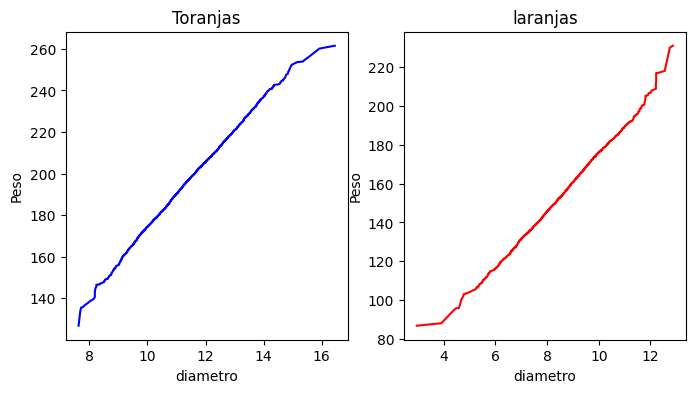

In [3]:
laranjas_diametro = dados [:5000,0]
laranjas_peso = dados [:5000,1]

toranjas_diametro = dados [5000:,0]
toranjas_peso = dados [5000:,1]

tela, grafico = plt.subplots(1, 2, figsize=(8, 4))  # 1 tela, 2 graficos

# Gráfico 1: Toranjas Peso
grafico[0].plot(toranjas_diametro,toranjas_peso, color='blue')
grafico[0].set_title('Toranjas')
grafico[0].set_xlabel('diametro')
grafico[0].set_ylabel('Peso')

grafico[1].plot(laranjas_diametro,laranjas_peso, color='red')
grafico[1].set_title('laranjas')
grafico[1].set_xlabel('diametro')
grafico[1].set_ylabel('Peso')

"""
print(laranjas_diametro)"""

### Pratica regressão linear, conficiente angular e linear!
Chegou a hora de você testar os conhecimentos desenvolvidos durante a aula. Continuando com o projeto das laranjas/toranjas agora você deve calcular o coeficiente ângular e o linear para a reta da laranja e para a reta da toranja. Use a fórmula de mínimos quadrados para encontrar cada um.

#### Calculo do coeficiente **angular** em regressão linear:

A formula que vamos aplicar é a seguinte:

$\large â = \frac{n.\sum(X_i.Y_i)-\sum X_i.\sum Y_i}{n.\sum X^2_i - (\sum X_i)^2}$ 

**Sendo:**
- $â$ o coeficiente angular
- X o diametro das laranjas/toranjas
- Y o peso das laranjas/toranjas
- n o total de pares entre x e y


#### Calculo do coeficiente **linear** em uma regressão linear simples:

a formula que vamos usar é:

$\large b = (\bar{y} - â)\bar{x}$

### onde:
- $\bar{y}$ é a média dos valores de Y
- $\bar{x}$ é a média dos valores de X
- $â$ é o **coeficiente angular da reta** que calculamos anteriormente!

a norma ficou em aproximadamente 291.7427171469184
a norma ficou em aproximadamente 135.49506106913367


Text(0.5, 1.0, 'toranjas')

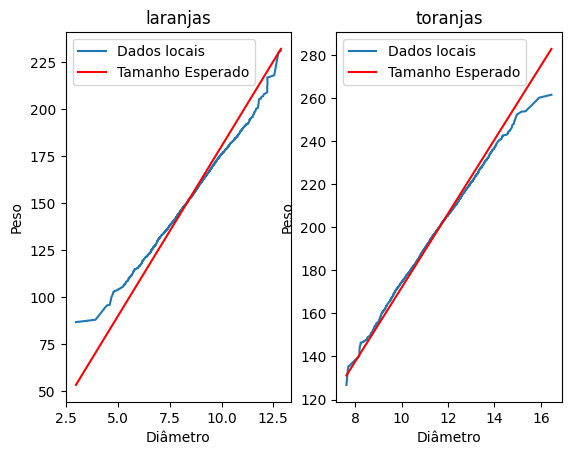

In [6]:


def coef_angular(X, Y): 
    n = np.size(laranjas_diametro)
    â = (n*(np.sum(X*Y)-np.sum(X)*np.sum(Y)))/(n*(np.sum(X**2)-np.sum(X)**2))
    
    return â



def coef_linear (X, Y, â):
    b = np.mean(Y)-â*np.mean(X)
    
    return b

def reta_linear(a,b,X):
    y=a*X+b
    return y



def regre_linear(X, Y, ax):
    a = coef_angular(X,Y)
    b = coef_linear(X,Y, a)
    y = reta_linear(a, b, X)

    ax.plot(X, Y, label="Dados locais")
    ax.plot(X, y, color='red', label="Tamanho Esperado")
    ax.set_xlabel("Diâmetro")
    ax.set_ylabel("Peso")
    ax.legend()

    print(f'a norma ficou em aproximadamente {np.linalg.norm(Y-y)}')
    
    
    
#define o total de figuras/graficos (total figuras, totais de graficos)
fig, graf = plt.subplots(1,2)

regre_linear(laranjas_diametro, laranjas_peso, graf[0])#passa para a função os Arrays x e y + posição do grafico -1
graf[0].set_title("laranjas")
regre_linear(toranjas_diametro,toranjas_peso, graf[1])#passa para a função os Arrays x e y + posição do grafico -1
graf[1].set_title("toranjas")
